In [6]:
!pip install opencv-python



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.0 MB/s eta 0:00:0000:0100:01


In [8]:
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.6 MB/s eta 0:00:0000:0100:01


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path="/Users/deepanshubasera/Downloads/surface-crack-detection"

# Define positive (crack) and negative (no crack) folders

In [6]:
positive_path = os.path.join(path, "positive")
negative_path = os.path.join(path, "negative")

# Get one image from each category

In [9]:
pos_img_path = os.path.join(positive_path, os.listdir(positive_path)[0])
neg_img_path = os.path.join(negative_path, os.listdir(negative_path)[0])

# Load images

In [12]:
pos_img = cv2.imread(pos_img_path)
neg_img = cv2.imread(neg_img_path)

# Convert to RGB (OpenCV loads images in BGR format)

In [15]:
pos_img = cv2.cvtColor(pos_img, cv2.COLOR_BGR2RGB)
neg_img = cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB)

# Display images

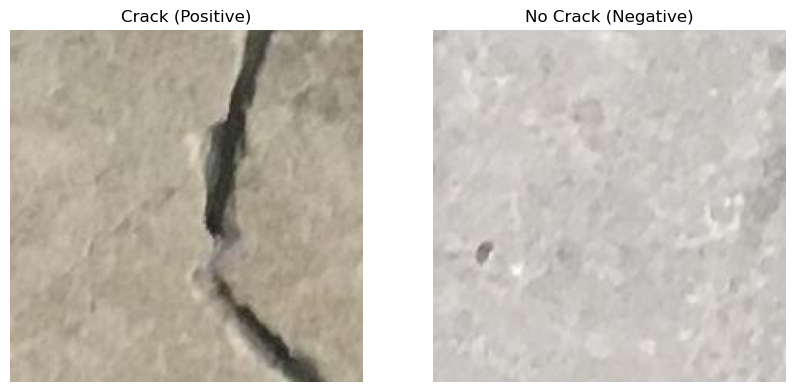

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(pos_img)
ax[0].set_title("Crack (Positive)")
ax[0].axis("off")

ax[1].imshow(neg_img)
ax[1].set_title("No Crack (Negative)")
ax[1].axis("off")

plt.show()

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define image size

In [23]:
img_size = (128, 128)

# Initialize arrays

In [26]:
X = []  # Image data
y = []  # Labels (1 = crack, 0 = no crack)

# Load and process all images

In [29]:
for label, folder in enumerate(["positive", "negative"]):
    folder_path = os.path.join(path, folder)
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=img_size)  # Resize image
        img = img_to_array(img) / 255.0  # Normalize (0-1 scale)
        X.append(img)
        y.append(label)  # Crack = 1, No Crack = 0

# Convert to NumPy arrays

In [31]:
X = np.array(X)
y = np.array(y)
print("Dataset loaded! Shape:", X.shape, "Labels:", y.shape)

Dataset loaded! Shape: (40000, 128, 128, 3) Labels: (40000,)


# Splitting

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (32000, 128, 128, 3) Testing set: (8000, 128, 128, 3)


# Define CNN model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (crack or no crack)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 125s 124ms/step - accuracy: 0.9109 - loss: 0.2473 - val_accuracy: 0.9821 - val_loss: 0.0752
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 203ms/step - accuracy: 0.9801 - loss: 0.0711 - val_accuracy: 0.9818 - val_loss: 0.0570
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 184s 184ms/step - accuracy: 0.9859 - loss: 0.0479 - val_accuracy: 0.9463 - val_loss: 0.1424
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 202s 202ms/step - accuracy: 0.9839 - loss: 0.0562 - val_accuracy: 0.9779 - val_loss: 0.0665
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 211s 211ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9896 - val_loss: 0.0478
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 211s 211ms/step - accuracy: 0.9920 - loss: 0.0277 - val_accuracy: 0.9861 - val_loss: 0.0433
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 202s 202ms/step - accuracy: 0.9918 - loss: 0.0280 - val_accuracy: 0.9841 - val_loss: 0.0591
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 172s 172ms/step - ac

# Pick a random test image

In [37]:
import random

random_index = random.randint(0, len(X_test) - 1)
test_img = X_test[random_index]
test_label = y_test[random_index]



# Predict

In [39]:

prediction = model.predict(np.expand_dims(test_img, axis=0))
predicted_label = "Crack" if prediction[0][0] > 0.5 else "No Crack"



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


# Show the image with prediction

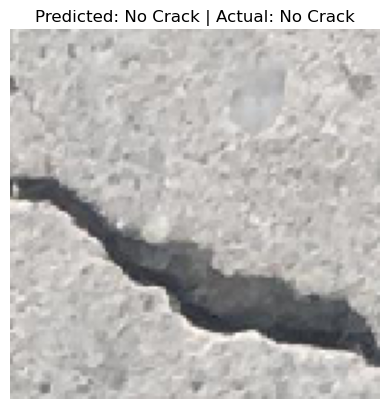

In [41]:
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_label} | Actual: {'Crack' if test_label == 1 else 'No Crack'}")
plt.axis("off")
plt.show()
